In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl  
import seaborn as sns
import numpy as np
import itertools
from scipy import stats
from emoji import UNICODE_EMOJI

Hipóteses

\begin{equation*}
   H_0:\mbox{Tem poucas meninas na engenharia por motivos externos} \rightarrow \mu_B=\mu_A \rightarrow \mu_B-\mu_A=0
\end{equation*}   
\begin{equation*}
   H_a:\mbox{Tem poucas meninas na engenharia por motivos internos} \rightarrow \mu_B\neq\mu_A \rightarrow \mu_B-\mu_A\neq0
\end{equation*}


Motivos externos: Mercado de trabalho, Salário, Vontade de outros
    
Motivos internos: Gosto por exatas/ curso

# 1a Análise: Faz ou não engenharia no Insper?

### Ler Arquivos Excel e colocar em um DataFrame

## PRIMEIRO SHEET : meninas na engenharia insper

Lendo arquivo Excel

In [2]:
eng_insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)

Limpar o DataFrame e Renomear algumas colunas

In [3]:
eng_insper = eng_insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Insper foi sua 1a opcao?': 'Sua atual faculdade foi sua 1a opção?', 'Como descobriu o Insper?':'Como descobriu sua faculdade?', 'Por que Insper?': 'Por que escolheu sua faculdade?'})


semestre=[]

for k in eng_insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper.SEMESTRE = semestre


eng_insper['Se "Não", qual?'] = eng_insper['Se "Não", qual?'].fillna('Insper')

eng_insper['Se "Sim" na pergunta anterior,  quais familiares?'] = eng_insper['Se "Sim" na pergunta anterior,  quais familiares?'].fillna('Ninguém')

In [4]:
eng_insper['Fez Insper?']='Sim'


In [5]:
eng_insper_idx=eng_insper.set_index('NOME')
eng_insper

,NOME,IDADE,SEMESTRE,TIPO_ENG,ESTADO/CID,TIPO_EM,NOME_EM,Algum familiar trabalha na área de engenharia?,"Se ""Sim"" na pergunta anterior, quais familiares?",Engenharia foi sua 1a escolha?,Por que escolheu Engenharia?,Sua atual faculdade foi sua 1a opção?,"Se ""Não"", qual?",Como descobriu sua faculdade?,Por que escolheu sua faculdade?,Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?,Quanto você espera ganhar no seu início de sua carreira?,Com quantos anos você espera se aposentar?,Você pretende ter filhos?,Fez Insper?
0,Vitória de Almeida Oliveira,Entre 19 a 21 anos,2,Engenharia Mecatrônica,osasco/são paulo,Escola Privada,Coc Sapiens,Não,Ninguém,Sim,Gosta de Exatas,Sim,Insper,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 15000 - R$ 20000,Entre 62 a 65 anos,Não,Sim
1,manuela castilla,Entre 16 a 18 anos,2,Engenharia Mecatrônica,são paulo são paulo,Escola Privada,Escola da vila,Sim,Pai e tio,Não,"Gosta de Exatas, Desde de criança brinca com e...",Sim,Insper,"Por amigos, Por família","Infraestrutura, Ensino diferenciado",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Sim
2,Mariana Sophia Abrantes,Entre 19 a 21 anos,2,Engenharia Mecânica,Sao Paulo/Sao Paulo,Escola Privada,Colégio Dante Alighieri,Sim,Pai e mãe,Sim,"Gosta de Exatas, Desde de criança brinca com e...",Não,Instituto Mauá de Tecnologia,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Sim
3,Maria Clara Luques,Entre 19 a 21 anos,8,Engenharia Mecatrônica,Barueri/SP,Escola Privada,Pueri Domus,Sim,"Pai, padrasto e irmão",Sim,"Gosta de Exatas, Desde de criança brinca com e...",Sim,Insper,"Por amigos, Por família","Infraestrutura, Ensino diferenciado",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Não,Sim
4,Beatriz Alexandre,Entre 16 a 18 anos,2,Engenharia Mecânica,São Paulo - SP,Escola Privada,Porto Seguro,Sim,Mãe e Pai,Sim,"Gosta de Exatas, Melhor para o mercado (Facili...",Sim,Insper,"Por amigos, Por família","Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Sim,Sim
5,Beatriz Mie,Entre 19 a 21 anos,2,Engenharia da Computação,São Bernardo do Campo - São Paulo,Escola Privada,Colégio Harmonia,Sim,Primas,Sim,"Gosta de Exatas, Melhor para o mercado (Facili...",Não,UFABC,Por amigos,Reconhecimento no mercado devido aos outros cu...,Não,R$ 10000 - R$ 15000,Entre 65 a 70 anos,Sim,Sim
6,Roberta Thome,Entre 19 a 21 anos,2,Engenharia Mecatrônica,Sp,Escola Privada,Dante Alighieri,Sim,Meu pai,Não,Gosta de Exatas,Não,Unicamp,"Por amigos, Por família","Infraestrutura, Ensino diferenciado, Oportunid...",Sim,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Sim
7,Rachel Maria,Entre 19 a 21 anos,8,Engenharia Mecânica,São Paulo SP,Escola Privada,Porto Seguro,Não,Ninguém,Não,"Gosta de Exatas, Melhor para o mercado (Facili...",Sim,Insper,Feira de Universidades/ Faculdades,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Não,Sim
8,Luiza Rodrigues silveira,Entre 19 a 21 anos,2,Engenharia da Computação,Uberlândia/Mg,Escola Privada,Nacional,Não,Ninguém,Sim,Gosta de Exatas,Não,UFU,Internet,"Infraestrutura, Ensino diferenciado",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Sim,Sim
9,Vitoria Helena de Mattos Camilo,Entre 19 a 21 anos,8,Engenharia da Computação,"Mogi das Cruzes, SP",Escola Privada,Objetivo,Sim,pai e mãe,Sim,"Gosta de Exatas, Desde de criança brinca com e...",Sim,Insper,"Por amigos, Influencia da Escola","Infraestrutura, Ensino diferenciado",Sim,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Sim


## SEGUNDO SHEET: engenharia de outras faculdades

Lendo arquivo Excel

In [6]:
eng_geral = pd.read_excel('PESQUISA.xlsx', sheet_name = 1)


Limpar o DataFrame e Renomear algumas colunas

In [7]:
eng_geral = eng_geral.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual engenharia?": "TIPO_ENG", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM"})


eng_geral['Se "Sim" na pergunta anterior,  quais familiares?'] = eng_geral['Se "Sim" na pergunta anterior,  quais familiares?'].fillna('Ninguém')


eng_geral['Se "Não", qual?'] = eng_geral['Se "Não", qual?'].fillna('A atual')


semestre=[]

for k in eng_geral.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_geral.SEMESTRE = semestre

In [18]:
eng_geral = eng_geral.drop('Distância da faculdade de casa...', 1)

In [19]:
eng_geral['Fez Insper?']='Não'


In [20]:
eng_geral_idx=eng_geral.set_index('NOME')
eng_geral

,NOME,IDADE,SEMESTRE,TIPO_ENG,ESTADO/CID,TIPO_EM,NOME_EM,Algum familiar trabalha na área de engenharia?,"Se ""Sim"" na pergunta anterior, quais familiares?",Engenharia foi sua 1a escolha?,Por que escolheu Engenharia?,Sua atual faculdade foi sua 1a opção?,"Se ""Não"", qual?",Como descobriu sua faculdade?,Por que escolheu sua faculdade?,Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?,Quanto você espera ganhar no seu início de sua carreira?,Com quantos anos você espera se aposentar?,Você pretende ter filhos?,Fez Insper?
0,Flávia Suplicy Luz,Entre 16 a 18 anos,8,Civil,São paulo,Escola Privada,Vera Cruz,Não,Ninguém,Sim,Gosta de Exatas,Não,Poli,"Por amigos, Por família, Influencia da Escola","Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 10000 - R$ 15000,Entre 62 a 65 anos,Sim,Não
1,Isabella Pires Mourão,Entre 16 a 18 anos,8,Civil,"Guarulhos, São Paulo",Escola Privada,Adventista,Sim,"Pai, Avô",Não,"Gosta de Exatas, Melhor para o mercado (Facili...",Não,Pública,"Por família, Feira de Universidades/ Faculdades","Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Não
2,Stella Panzetti Chahin,Entre 16 a 18 anos,8,Produção,SP,Escola Privada,Colégio Magno,Sim,"Mãe, padrasto, irmã, avô, tia, tio.",Não,"Gosta de Exatas, Melhor para o mercado (Facili...",Sim,A atual,"Por família, Feira de Universidades/ Faculdades",Infraestrutura,Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Sim,Não
3,Amanda Oliveira Calvo,Entre 22 a 25 anos,8,Biomédica,Rio de Janeiro,Escola Privada,Móbile,Não,Ninguém,Sim,Gosta de Exatas,Não,Engenharia elétrica,Por amigos,Porque é pública,Sim,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Sim,Não
4,Fernanda Nunes,Entre 22 a 25 anos,8,Engenharia Biomédica,"São Bernardo, São Paulo",Escola Privada,Centro Educacional Cidade El Shadai,Não,Ninguém,Sim,"Gosta de Exatas, Melhor para o mercado (Facili...",Sim,A atual,Feira de Universidades/ Faculdades,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Não
5,Beatriz Gonçalves,Entre 19 a 21 anos,8,Materiais,São Paulo,Escola Privada,SESI,Não,Ninguém,Sim,Gosta de Exatas,Sim,A atual,Feira de Universidades/ Faculdades,Ensino diferenciado,Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Não
6,Giovana Muniz de Carvalho,Entre 19 a 21 anos,8,Engenharia Civil,São Paulo / SP,Escola Privada,"Maria Imaculada ""Dr. Piero Roverssi""",Sim,Pai,Sim,"Gosta de Exatas, Desde de criança brinca com e...",Não,Mauá,"Por família, Influencia da Escola, Feira de Un...","Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Acima de 70 anos,Sim,Não
7,Giovanna Ciccotti Parize,Entre 19 a 21 anos,8,Engenharia Civil,São Paulo,Escola Privada,Colégio Esperanto,Não,Ninguém,Sim,Gosta de Exatas,Não,Universidade de São Paulo,Feira de Universidades/ Faculdades,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Não
8,Ana Beatriz Tibucheski Miguel,Entre 19 a 21 anos,8,Elétrica,São Paulo,Escola Privada,Nossa senhora de sion,Sim,"Pai, Tio",Sim,"Gosta de Exatas, Melhor para o mercado (Facili...",Não,Usp,"Por amigos, Por família, Influencia da Escola,...","Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Não
9,Anna Clara Passos,Entre 19 a 21 anos,8,Civil,Itanhandu/MG,Escola Privada,Objetivo,Sim,Pai e irmão,Sim,"Gosta de Exatas, Desde de criança brinca com e...",Sim,A atual,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Não


* Juntando os DataFrames

In [21]:
eng_geral.shape

(91, 20)

In [22]:
len(eng_insper_idx)

30

In [23]:
len(eng_geral_idx)

91

In [24]:
len(pd.concat([eng_insper_idx, eng_geral_idx]))

121

In [25]:
eng = pd.concat([eng_insper_idx, eng_geral_idx])
eng

,IDADE,SEMESTRE,TIPO_ENG,ESTADO/CID,TIPO_EM,NOME_EM,Algum familiar trabalha na área de engenharia?,"Se ""Sim"" na pergunta anterior, quais familiares?",Engenharia foi sua 1a escolha?,Por que escolheu Engenharia?,Sua atual faculdade foi sua 1a opção?,"Se ""Não"", qual?",Como descobriu sua faculdade?,Por que escolheu sua faculdade?,Ter poucas meninas na engenharia te desmotiva a ingressar na engenharia?,Quanto você espera ganhar no seu início de sua carreira?,Com quantos anos você espera se aposentar?,Você pretende ter filhos?,Fez Insper?
NOME,,,,,,,,,,,,,,,,,,,
Vitória de Almeida Oliveira,Entre 19 a 21 anos,2,Engenharia Mecatrônica,osasco/são paulo,Escola Privada,Coc Sapiens,Não,Ninguém,Sim,Gosta de Exatas,Sim,Insper,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 15000 - R$ 20000,Entre 62 a 65 anos,Não,Sim
manuela castilla,Entre 16 a 18 anos,2,Engenharia Mecatrônica,são paulo são paulo,Escola Privada,Escola da vila,Sim,Pai e tio,Não,"Gosta de Exatas, Desde de criança brinca com e...",Sim,Insper,"Por amigos, Por família","Infraestrutura, Ensino diferenciado",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Sim
Mariana Sophia Abrantes,Entre 19 a 21 anos,2,Engenharia Mecânica,Sao Paulo/Sao Paulo,Escola Privada,Colégio Dante Alighieri,Sim,Pai e mãe,Sim,"Gosta de Exatas, Desde de criança brinca com e...",Não,Instituto Mauá de Tecnologia,Por amigos,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Sim
Maria Clara Luques,Entre 19 a 21 anos,8,Engenharia Mecatrônica,Barueri/SP,Escola Privada,Pueri Domus,Sim,"Pai, padrasto e irmão",Sim,"Gosta de Exatas, Desde de criança brinca com e...",Sim,Insper,"Por amigos, Por família","Infraestrutura, Ensino diferenciado",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Não,Sim
Beatriz Alexandre,Entre 16 a 18 anos,2,Engenharia Mecânica,São Paulo - SP,Escola Privada,Porto Seguro,Sim,Mãe e Pai,Sim,"Gosta de Exatas, Melhor para o mercado (Facili...",Sim,Insper,"Por amigos, Por família","Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Sim,Sim
Beatriz Mie,Entre 19 a 21 anos,2,Engenharia da Computação,São Bernardo do Campo - São Paulo,Escola Privada,Colégio Harmonia,Sim,Primas,Sim,"Gosta de Exatas, Melhor para o mercado (Facili...",Não,UFABC,Por amigos,Reconhecimento no mercado devido aos outros cu...,Não,R$ 10000 - R$ 15000,Entre 65 a 70 anos,Sim,Sim
Roberta Thome,Entre 19 a 21 anos,2,Engenharia Mecatrônica,Sp,Escola Privada,Dante Alighieri,Sim,Meu pai,Não,Gosta de Exatas,Não,Unicamp,"Por amigos, Por família","Infraestrutura, Ensino diferenciado, Oportunid...",Sim,R$ 5000 - R$ 10000,Entre 62 a 65 anos,Sim,Sim
Rachel Maria,Entre 19 a 21 anos,8,Engenharia Mecânica,São Paulo SP,Escola Privada,Porto Seguro,Não,Ninguém,Não,"Gosta de Exatas, Melhor para o mercado (Facili...",Sim,Insper,Feira de Universidades/ Faculdades,"Infraestrutura, Reconhecimento no mercado devi...",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Não,Sim
Luiza Rodrigues silveira,Entre 19 a 21 anos,2,Engenharia da Computação,Uberlândia/Mg,Escola Privada,Nacional,Não,Ninguém,Sim,Gosta de Exatas,Não,UFU,Internet,"Infraestrutura, Ensino diferenciado",Não,R$ 5000 - R$ 10000,Entre 65 a 70 anos,Sim,Sim


Text(0.5,1,'se tem familiares na engenharia')

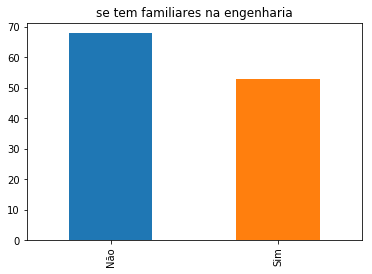

In [35]:
eng["Algum familiar trabalha na área de engenharia?"].value_counts().plot.bar()
plt.title("se tem familiares na engenharia")

#  2a Análise: Faz Engenharia ou Adm/Eco no Insper?

# PRIMEIRO SHEET: meninas na engenharia Insper

In [16]:
# leitura do excel
eng_insper_2 = pd.read_excel('PESQUISA.xlsx', sheet_name = 0)



In [17]:
#limpeza e modificações


semestre=[]

for k in eng_insper_2.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
eng_insper_2.SEMESTRE = semestre


eng_insper_2['Se "Não", qual?'] = eng_insper_2['Se "Não", qual?'].fillna('Insper')

eng_insper_2['Se "Sim" na pergunta anterior,  quais familiares?'] = eng_insper_2['Se "Sim" na pergunta anterior,  quais familiares?'].fillna('Ninguém')
eng_insper_2['Faz Engenharia?']= 'Sim'


eng_insper_2.columns.tolist()

AttributeError: 'DataFrame' object has no attribute 'SEMESTRE'

In [ ]:
insper_idx.columns.tolist()

## QUARTO SHEET: adm/econo insper


Lendo arquivo Excel

In [ ]:
insper = pd.read_excel('PESQUISA.xlsx', sheet_name = 3)

Limpar o DataFrame e Renomear algumas colunas

In [ ]:
insper['Se "Não", qual?'] = insper['Se "Não", qual?'].fillna('Insper')
insper = insper.rename(columns={"Qual seu nome completo?": "NOME", "Qual semestre?": "SEMESTRE", "Idade": "IDADE", "Qual curso?": "Curso", "De onde você veio (cidade/estado)?": "ESTADO/CID", "Frequentou o Ensino Médio...":"TIPO_EM", "Qual o nome do seu colégio?": "NOME_EM", 'Algum familiar trabalha na área de adm e/ou econo?': 'Familiar na área?'})
semestre=[]

for k in insper.SEMESTRE:
    if k == "2º Semestre":
        semestre.append(2)
    elif k == "3º Semestre":
        semestre.append(3)
    elif k == "4º Semstre":
        semestre.append(4)
    elif k =="5º Semestre":
        semestre.append(5)
    elif k =="6º semestre":
        semestre.append(6)
    elif k == "7º Semestre":
        semestre.append(7)
    else:
         semestre.append(8)
            
insper.SEMESTRE = semestre


In [ ]:
insper_idx=insper.set_index('NOME')

In [ ]:
insper_idx['Faz Engenharia?']='Não'

In [ ]:
Insper=pd.concat([eng_insper_2_analise, insper_idx])
Insper

In [ ]:
len(eng_insper_2_analise.columns.tolist())

In [ ]:
len(insper_idx.columns.tolist())

# Bibliografia:

* pd.concat:
https://stackoverflow.com/questions/21435176/appending-two-dataframes-with-same-columns-different-order